In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
df = pd.read_parquet("../dataset/etl/L2.house_regression.parquet")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20146 entries, 0 to 20145
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   price                          20146 non-null  float64
 1   kamar_tidur                    20146 non-null  float64
 2   kamar_mandi                    20146 non-null  float64
 3   sertifikat                     20146 non-null  object 
 4   kamar_pembantu                 20146 non-null  float64
 5   kamar_mandi_pembantu           20146 non-null  float64
 6   jumlah_lantai                  20146 non-null  float64
 7   dapur                          20146 non-null  float64
 8   garasi                         20146 non-null  float64
 9   pemandangan                    20146 non-null  object 
 10  carport                        20146 non-null  float64
 11  sumber_air                     20146 non-null  object 
 12  konsep_dan_gaya_rumah          20146 non-null 

In [3]:
df.head()

,price,kamar_tidur,kamar_mandi,sertifikat,kamar_pembantu,kamar_mandi_pembantu,jumlah_lantai,dapur,garasi,pemandangan,...,house_mat_bata_merah,house_mat_batako,house_mat_beton,floor_mat_granit,floor_mat_keramik,floor_mat_marmer,floor_mat_ubin,floor_mat_vinyl,district,city
0,3300.0,3.0,3.0,SHM - Sertifikat Hak Milik,1.0,1.0,1.0,1.0,0.0,Pemukiman Warga,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Puncak,Bogor
1,850.0,4.0,3.0,SHM - Sertifikat Hak Milik,4.0,1.0,1.0,1.0,4.0,Pegunungan,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Cipanas,Bogor
2,1000.0,3.0,2.0,SHM - Sertifikat Hak Milik,0.0,0.0,2.0,1.0,1.0,Pemukiman Warga,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Cileungsi,Bogor
3,2500.0,3.0,3.0,SHM - Sertifikat Hak Milik,2.0,1.0,1.0,1.0,3.0,Pemukiman Warga,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Caringin,Bogor
4,3000.0,4.0,4.0,"Lainnya (PPJB,Girik,Adat,dll)",0.0,0.0,1.0,1.0,0.0,Pemukiman Warga,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Kranggan,Bogor


### Cleaning Kamar Tidur

<Axes: xlabel='count', ylabel='kamar_tidur'>

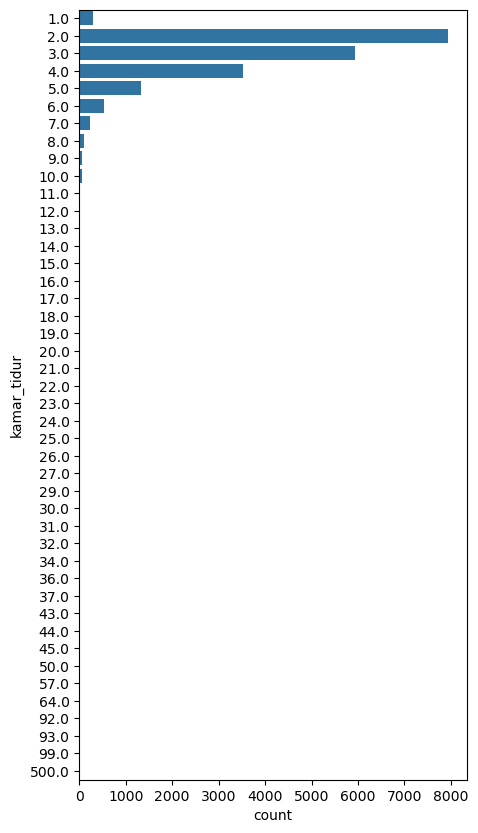

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(5, 10))
sns.barplot(df["kamar_tidur"].value_counts(), ax=ax, orient="h")

In [18]:
# filter by kamar_tidur <= 8
df_clean = df.copy()
df_clean = df_clean[df_clean["kamar_tidur"] <= 8]
df_clean.shape

(19890, 45)

### Cleaning Price

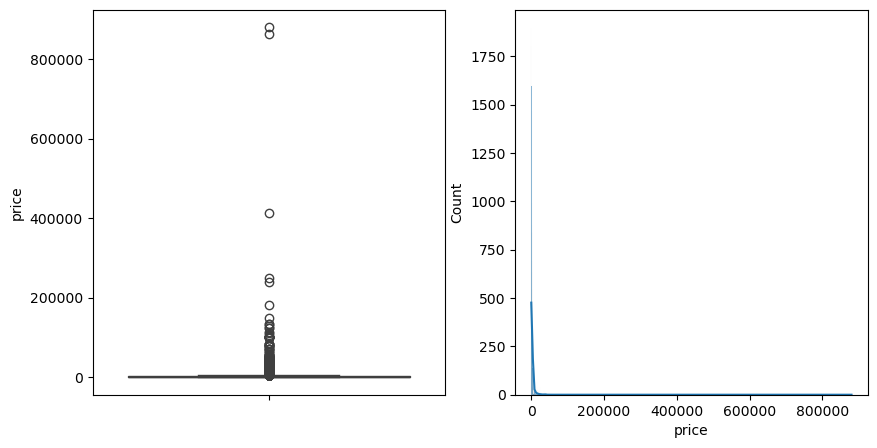

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
sns.boxplot(df["price"], ax=ax1)
sns.histplot(df["price"], kde=True, ax=ax2)
fig.tight_layout()
plt.show()

In [21]:
iqr = df_clean["price"].quantile(0.75) - df_clean["price"].quantile(0.25)
lower_bound = df_clean["price"].quantile(0.25) - (1.5 * iqr)
upper_bound = df_clean["price"].quantile(0.75) + (1.5 * iqr)

df_clean = df_clean[(df_clean["price"] > lower_bound) & (df_clean["price"] < upper_bound)]
df_clean.shape

(18030, 45)

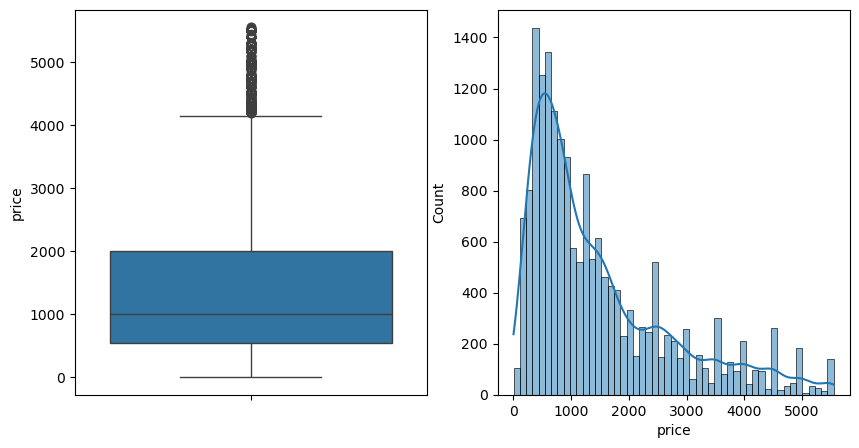

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(df_clean["price"], ax=ax1)
sns.histplot(df_clean["price"], kde=True, ax=ax2)
fig.tight_layout()
plt.show()